In [1]:
import numpy as np
import pandas as pd
# matplotlibをimport
import matplotlib.pyplot as plt
%matplotlib inline

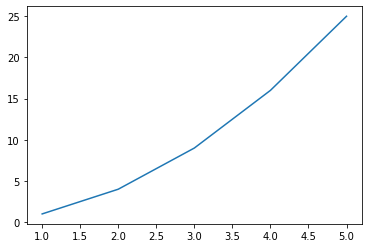

In [4]:
# x, yのリストを指定し描画
x = [1, 2, 3, 4, 5]
# y = [1, 4, 8, 16, 25]
y = np.array(x)**2
plt.plot(x, y)

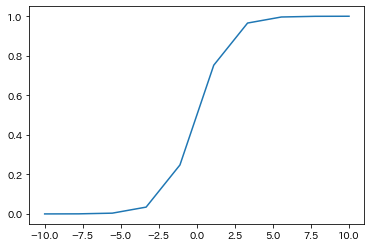

In [6]:
x = np.linspace(-10, 10, 10)
z = 1 / (1 + np.exp(-x))
plt.plot(x,z)

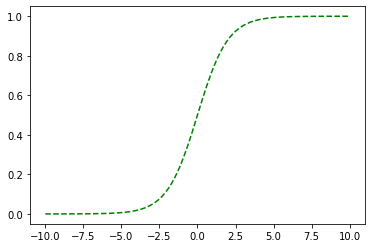

In [8]:
plt.plot(x,z,'g--')

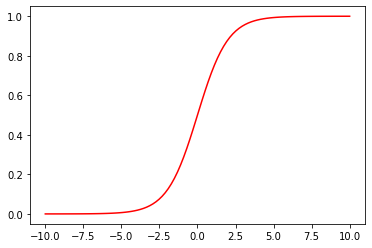

In [10]:
plt.plot(x,z,
        color='red')

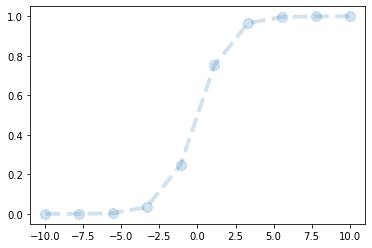

In [19]:
plt.plot(x,z,
        lw=4,
        ls='--',
        marker='o',
        markersize=10,
        alpha=0.2)

In [3]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 1.1 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=1bcabf5e2eb05ff01fb6ec78e2bc7c5d21f252b2cc6a4fc144b8d086f5d9f90e
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import japanize_matplotlib

([<matplotlib.axis.XTick at 0x7f4aa97e8690>,
 <a list of 3 Text xticklabel objects>)

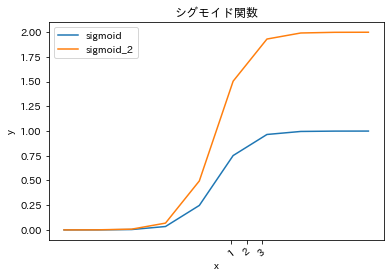

In [7]:

plt.plot(x,z,label='sigmoid')
plt.plot(x,z*2,label='sigmoid_2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('シグモイド関数')
plt.legend()
plt.xticks([1,2,3], rotation=39)

In [8]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

In [36]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [58]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [50]:
df['release_date'][0]

'2009-12-10'

In [48]:
int(df['release_date'][0][:4])

2009

In [60]:
def a(x):
    return x[:4]

In [61]:
a('2009-12-10')

'2009'

In [64]:
df['release_date'][0][:4]

'2009'

In [68]:
df['release_date'].apply(lambda x: x[:4])

TypeError: 'float' object is not subscriptable

これ出たらnp.nanがある！！！！

In [75]:
df = df.dropna(subset=['release_date'])

In [76]:
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

Text(0, 0.5, 'count')

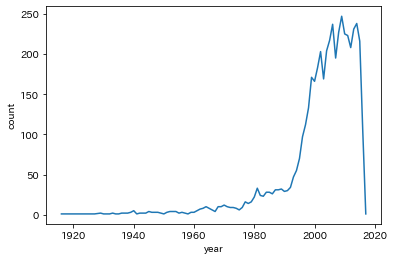

In [80]:
plt.plot(df.groupby('year')['id'].count())
plt.xlabel('year')
plt.ylabel('count')


In [83]:
df = df[df['revenue'] != 0]

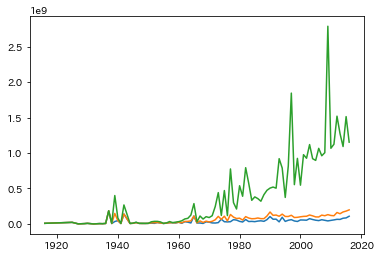

In [87]:
plt.plot(df.groupby('year').median()['revenue'])
plt.plot(df.groupby('year').mean()['revenue'])
plt.plot(df.groupby('year')['revenue'].max())

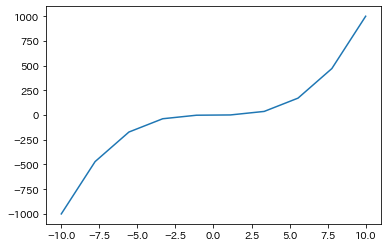

In [15]:
fig, ax = plt.subplots()
ax.plot(x,x**3)

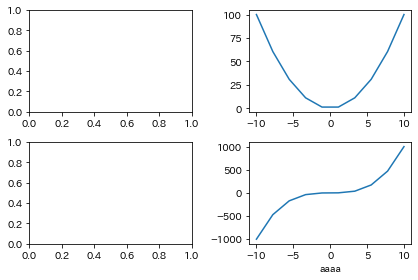

In [21]:
fig, ax = plt.subplots(2,2)
ax[0,1].plot(x,x**2)
ax[1,1].plot(x,x**3)
ax[1,1].set_xlabel('aaaa')
fig.tight_layout()
plt.show()

In [23]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')


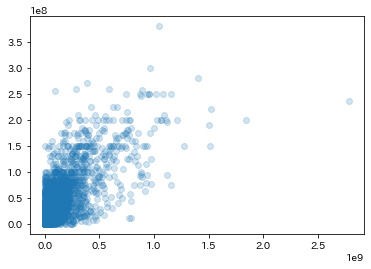

In [26]:
plt.scatter(df['revenue'],df['budget'],alpha=0.2)

In [27]:
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]

Text(0, 0.5, 'budget')

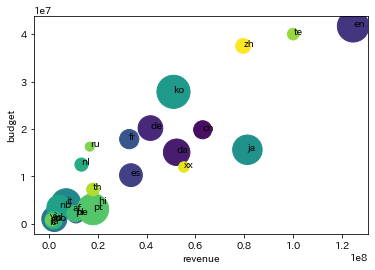

In [59]:
df_ = df.groupby('original_language').mean()[['budget','revenue','vote_count']]
c = np.arange(len(df_))
plt.scatter('revenue','budget',s='vote_count',c=c,data=df_)
for idx, row in df_.iterrows():
    plt.annotate(idx,(row['revenue'],row['budget']))
plt.xlabel('revenue')
plt.ylabel('budget')

In [55]:
for idx, row in df_.iterrows():
    print(idx,row['budget'],row['revenue'])

af 3000000.0 9879971.0
cn 19843390.6 62960727.8
da 15100000.0 52323054.0
de 20198861.111111112 41595543.222222224
en 41661204.263700835 124545062.57736944
es 10275057.8 33627368.86666667
fa 180000.0 900000.0
fr 17865338.04 32924654.84
he 2000000.0 11125849.0
hi 4400000.0 20106630.42857143
id 1050000.0 2274881.0
is 10.0 11.0
it 4300005.0 7068818.5
ja 15630592.23076923 81266357.61538461
ko 27840000.0 51023522.6
nb 3500000.0 4159678.0
nl 12500000.0 13361558.0
no 800000.0 1984662.0
pl 2159280.0 10700000.0
pt 3100000.0 18119239.0
ro 852510.0 1185783.0
ru 16283333.333333334 16762171.333333334
te 40000000.0 100000000.0
th 7250000.0 18051122.0
vi 1300000.0 639000.0
xx 12000000.0 55260558.0
zh 37514692.307692304 79536962.15384616


Text(0.5, 0, 'vote_average')

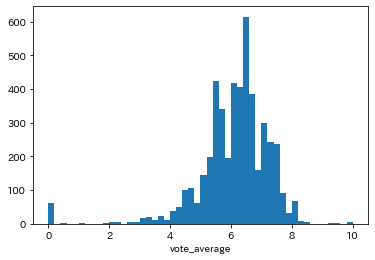

In [62]:
# 映画の評価スコアのヒストグラム
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=50)
plt.xlabel('vote_average')

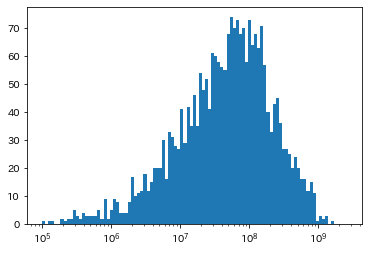

In [81]:
fig,ax = plt.subplots()
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['profit'] = df.apply(
    lambda x: x['revenue']-x['budget'],
    axis=1
)
bins = np.logspace(5,np.log10(df['profit'].max()),100)
ax.hist(
    df['profit'],
    bins=bins
)
ax.set_xscale('log')
plt.show()

In [79]:
bins = np.logspace(5,np.log10(df['profit'].max()),100)


In [66]:
df['profit']

0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4773       3124130
4788       5988000
4792         79000
4796        417760
4798       1820920
Name: profit, Length: 3229, dtype: int64